***
***

 <br><h2>MACHINE LEARNING : ASSIGNMENT 2</h2>
                        <h4>MV SHIVAANI - COHORT 3</h4>

***
***


<h3>Apprentice Chef</h3><br>
<strong>Company background: A 3 year-old SF based startup giving a unique spin to home cooking for busy professionals</strong><br>

<strong>ITEMS OFFERED :</strong> <br>

<strong>Meal sets</strong> ( price range 10USD to 23USD) consisting of choice of protein, veggies, carbs and seasoning.<br>
<strong>Beverages</strong> (can be ordered only with meal sets) (price range 1USD to  25USD), includes half bottle wine can only be ordered if more than 21 years age

<strong>SPECIAL PLANS:</strong>
- <strong> Weekly plan: </strong> <br>
Total 3 meals => 10% discount<br>
Total 5 meals => 20% discount
- <strong> Halfway there:</strong>  <BR>
Deliver half a bottle wine every Wednesday

*** 
<strong> OBJECTIVE </strong> <br>
Building a Machine Learning Model to predict which customers will <strong>subscribe to 'Halfway There'</strong>

***
<STRONG>DATA</STRONG>
- Sample of 2000 customers:<br>
• at least one purchase per month for a total of 11 of their first 12 months<br>
• at least one purchase per quarter and at least 15 purchases throughout their first yearat least one purchase per month for a total of 11 of their first 12 months

<strong> ASSUMPTIONS and OBSERVATIONS </strong> <br>

1. There is a subscription fee for both WEEKLY PLAN and CROSS_SELL_PLAN. <br><br>

2. NO ADDITIONAL delivery charges because even if we assume a delivery charge per order based on competitor's policy, it would not be feasible to apply it to our dataset as we only have information on number of meals and not on number of orders. For instance, 83% of all meals ordered by 1 customer came from a single order. <br><br>

3. No refund on CANCELLATIONS_AFTER_NOON (i.e. canceled after 3 PM) because case description excludes this scenario and only talks bout a) Full refund if canceled by 12 PM (i.e. Cancellations before noon) and b) 50% refund if canceled BY 3 PM. All orders are paid for at the time of placing the order. <br><br>

4. Total number of meals purchased = Total number of meals ordered - CANCELLATIONS_BEFORE_NOON <br><br>

5. More than one beverage set  can be ordered with a meal set.
-If someone orders most expensive meal set which costs 23USD and most expensive beverage set that is 33USD then, maximum revenue per meal is 56. There are 10 people with average revenue per meal > 56 and they didnt subscribe to cross sell plan and weekly plan either; this implies more than one beverage set can be ordered per meal.<br><br>

6. Two customers did not subscribe to WEEKLY_PLAN yet had an average revenue per meal of less than 10USD, which is the minimum price for a meal set. Looks like there have been some promotional offers in between, may be like referral program or first time off, etc. 
Need to ask management for more information.





***
<strong><h2>METHODLOGY</h2></strong>

<h3>Importing Libraries</h3>

In [1]:
from datetime import datetime
start_time = datetime.now()

In [2]:
##Importing libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals.six import StringIO 
from IPython.display import Image                    # displays on frontend
import pydotplus  
from sklearn.tree import export_graphviz             # exports graphics


from sklearn.preprocessing import StandardScaler # standard scaler
import sklearn.linear_model # linear models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier # KNN for Regression
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix         # confusion matrix

/Users/mvs/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


<h3>Data Preprocessing </h3><br>


In [3]:
##Reading the file in Python

file= 'Apprentice_Chef_Dataset.xlsx'
original_df = pd.read_excel(file)
my_data=original_df.copy()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
PC_LOGINS                       1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
W

In [5]:
my_data.describe()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,0.714286,5.515930,1.476362,11.329908,1.486125,2.970709,0.355087,0.113052,35.411100,150.556578,4.436793,0.604317,2.794964,13.508222,106.433710
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,0.451870,0.580757,0.527600,13.573303,2.318599,2.744598,0.478663,0.316738,26.577927,49.447180,1.550972,0.641866,0.756528,2.333876,181.014124
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.400000,0.000000,0.000000,1.000000,5.000000,0.000000
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,10.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,1.000000,6.000000,1.000000,7.000000,0.000000,2.000000,0.000000,0.000000,30.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,1.000000,6.000000,2.000000,13.000000,3.000000,4.000000,1.000000,0.000000,60.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000
max,8793.750000,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,1.000000,7.000000,3.000000,52.000000,9.000000,19.000000,1.000000,1.000000,90.000000,564.200000,11.000000,3.000000,5.000000,19.000000,1600.000000


Based on the analysis of descriptive statistics computed above, it is felt that there is a need to engineer more features and to examine the distributions in detail. Accordingly, following sections consist of sections focusing on generation of additional features and visual exploratory data analysis.

***
<h3>Creating additional features based on:<br></h3>
    <h4>-Combinations<br></h4>
    <h4>-Interactions<br></h4>
    <h4>-Transformation<br></h4>
    

Combinations based on revenue:

Revenue from a customer = Revenue from total meals purchased + Subscription fees from Weekly Plan + Subscription fee from Cross Sell Success

- Accordingly, if a person has not subscribed to Weekly plan and hence has not paid subscription fees towards it yet his average revenue per meal > 23 USD; he is classified as a <strong>DEF(initely)</strong> beverage person because 23USD is the maximum revenue that could come from meal sets. <br>
(<strong>NOTE</strong>: It could be argued that average revenue per meal could be greater than 23 due to subscription to halfway there. But, that logic makes them all the more DEF Beverage people.<br><br>

- Similarly any person who had average revenue more than 33 (irrespective of subscription) to weekly plan is considered possible beverage people. 33 is based on the fact that average meal set costs 16.5 and average beverage also costs 16.5. Or it could be seen as that some people may have subscription fees which results in average revenue per meal > 33. Hence, they are <strong> POSSIBLE beverage people </strong>.<br> <br>

- As mentioned in intro there are people whose average revenue per meal > 56 that is more than max of meal and beverage; they are considered as <strong> MORE </strong> beverage people as they are probably ordering more than 1 beverage set.







In [6]:
## Creating features based on revenue and TOTAL MEALS ORDERED
my_data['TOTAL_MEALS_PURCAHSED'] = my_data['TOTAL_MEALS_ORDERED'] - my_data['CANCELLATIONS_BEFORE_NOON']
my_data['REVPERPURCHASE']= my_data['REVENUE']/my_data['TOTAL_MEALS_PURCAHSED']
my_data['DEF_BEV_PPL']=  ((my_data['WEEKLY_PLAN']==0) & (my_data['REVPERPURCHASE']>23)).astype(int)
my_data['POSSIBLE_BEV_PPL']= (my_data['REVPERPURCHASE']> 33).astype(int)
my_data['MORE_BEV_PPL']= (my_data['REVPERPURCHASE']> 56).astype(int)
my_data['WEEKLY_PLAN_YN']= (my_data['WEEKLY_PLAN']> 0).astype(int)


<h4><b>
Interaction based features:</b></h4>
Interaction terms are based on theoretical rationale. 
The interaction based features are used to capture the relationship between different variables. I tried different interaction based features which I felt might be related or impacting the overall model. We can look at the model later and filter out the interactions that are not significant. 


In [7]:

#Interaction between Revenue per meal and median meal rating
my_data['REVPERMEAL_RATING']= my_data['REVPERPURCHASE']*my_data['MEDIAN_MEAL_RATING']

#Interaction between Revenue per meal and taste and preferences

my_data['REVPERMEAL_PREFERENCES']= my_data['REVPERPURCHASE']*my_data['TASTES_AND_PREFERENCES']

#Interaction between Revenue per meal and followed recommendation percent
my_data['REVPERMEAL_RECO']= my_data['REVPERPURCHASE']*my_data['FOLLOWED_RECOMMENDATIONS_PCT']

#Interaction between Revenue per meal and product categories viewed
my_data['REVPERMEAL_CATEGORIES']= my_data['REVPERPURCHASE']*my_data['PRODUCT_CATEGORIES_VIEWED']

#Interaction between Revenue per meal and weekly plan
my_data['REVPERMEAL_WEEKLY_YN']= my_data['REVPERPURCHASE']*my_data['WEEKLY_PLAN_YN']


#Interaction between Definitely beverage people and median meal rating
my_data['DEF_BEV_PPL_RATING']= my_data['DEF_BEV_PPL']*my_data['MEDIAN_MEAL_RATING']

#Interaction between Definitely beverage people and taste and preferences
my_data['DEF_BEV_PPL_RATING']= my_data['DEF_BEV_PPL']*my_data['TASTES_AND_PREFERENCES']

#Interaction between Definitely beverage people and followed recommendation percent
my_data['DEF_BEV_PPL_RECO']= my_data['DEF_BEV_PPL']*my_data['FOLLOWED_RECOMMENDATIONS_PCT']

#Interaction between Revenue per meal and product categories viewed
my_data['DEF_BEV_PPL__CATEGORIES']= my_data['DEF_BEV_PPL']*my_data['PRODUCT_CATEGORIES_VIEWED']

#Interaction between Revenue per meal and weekly plan
my_data['DEF_BEV_PPL__WEEKLY_YN']= my_data['DEF_BEV_PPL']*my_data['WEEKLY_PLAN_YN']


#Interaction between Possible beverage people and median meal rating
my_data['POSSIBLE_BEV_PPL_RATING']= my_data['POSSIBLE_BEV_PPL']*my_data['MEDIAN_MEAL_RATING']

#Interaction between Possible beverage people and taste and preferences
my_data['POSSIBLE_BEV_PPL_PREFERENCE']= my_data['POSSIBLE_BEV_PPL']*my_data['TASTES_AND_PREFERENCES']

#Interaction between Possible beverage people and followed recommendation percent
my_data['POSSIBLE_BEV_PPL_RECO']= my_data['POSSIBLE_BEV_PPL']*my_data['FOLLOWED_RECOMMENDATIONS_PCT']

#Interaction between Revenue per meal and product categories viewed
my_data['POSSIBLE_BEV_PPL__CATEGORIES']= my_data['POSSIBLE_BEV_PPL']*my_data['PRODUCT_CATEGORIES_VIEWED']

#Interaction between Revenue per meal and weekly plan
my_data['POSSIBLE_BEV_PPL__WEEKLY_YN']= my_data['POSSIBLE_BEV_PPL']*my_data['WEEKLY_PLAN_YN']

# Interaction of subscription to weekly plan and total meals ordered
my_data['PLAN_MEALS']= my_data['WEEKLY_PLAN'] * my_data['TOTAL_MEALS_ORDERED']

# Interaction of contacts to customer service and product categories viewed
my_data['CSPCVIEWED']= my_data['CONTACTS_W_CUSTOMER_SERVICE'] * my_data['PRODUCT_CATEGORIES_VIEWED']

# Interaction of average time per visit and product categories viewed
my_data['TIME_VIEWED']= my_data['AVG_TIME_PER_SITE_VISIT'] * my_data['PRODUCT_CATEGORIES_VIEWED']

# Interaction of subscription to weekly plans and unique meals purchased; 
# AS the relationship with revenue seemed non-linear, tranfromed to form 1/X
my_data['PLAN_UNIQUE'] = 1.0/(1+(my_data['WEEKLY_PLAN'] * my_data['UNIQUE_MEALS_PURCH']))

#Interaction of fact wether person filled in his preferneces and unique meals ordered
my_data['TASTE_UNIQUE'] = my_data['TASTES_AND_PREFERENCES'] * my_data['UNIQUE_MEALS_PURCH']

# Interaction of median meal rating and number of unique meals purchased
my_data['UNIQUE_MEALS_X_RATING'] = my_data['MEDIAN_MEAL_RATING'] * my_data['UNIQUE_MEALS_PURCH']
my_data['UNIQUE_PURCH_BINARY']=(my_data['UNIQUE_MEALS_PURCH']>1).astype(int)
my_data['UNIQUE_BINARY_X_RATING']= my_data['UNIQUE_PURCH_BINARY']*my_data['MEDIAN_MEAL_RATING']

# Interaction of median meal rating and average time spent watching prep vide
my_data['RATING_X_PREPTIME'] = my_data['MEDIAN_MEAL_RATING'] * my_data['AVG_PREP_VID_TIME']
my_data['UNIQUE_X_PREPTIME'] = my_data['UNIQUE_MEALS_PURCH'] * my_data['AVG_PREP_VID_TIME']

# Interaction of fact that preferences was filled  and recommendations followed
my_data['PREFERENCE_X_RECOMMENDATION']= my_data['FOLLOWED_RECOMMENDATIONS_PCT'] * my_data['TASTES_AND_PREFERENCES']

# To capture number of times customer service was contacted per meal ordered
my_data['AVERAGE_CUST_HELP'] = my_data['CONTACTS_W_CUSTOMER_SERVICE'] / my_data['TOTAL_MEALS_ORDERED']
# Interaction of average customer help and average time per visit
my_data['AVG_TIME_AVG_CUST_SERVICE']= my_data['AVERAGE_CUST_HELP']*my_data['AVG_TIME_PER_SITE_VISIT']
my_data['TOTAL_TIME'] = my_data['AVG_TIME_PER_SITE_VISIT'] * (my_data['MOBILE_LOGINS'] + my_data['PC_LOGINS'])


<h4><b>
Features based on combinations: </b></h4>

<br> Feature combinations are created based on the intuition on what things can impact the cross sell success, we added all these features in the model and then iterated the features to keep only the significant once in the end </br>

Some of the features are as follows:
\ 1. ratio of total to unique meals -> the idea is to understand how many times on average an individual meal is ordered. The assumption is that people with wine preferences will like to have more different kind of meals to go with wine. 
\ 2. Percent of logins from different devices -> Do people see wine preferences on PC or Laptop and ratio of difference combinations between the two variables
\ 3. Percentage of times the deliveries were delayed.  


In [8]:
########### Creating combination variables based on theoretical rationale ################## 

# To understand repetitive buying behaviour
my_data['UNIQUE_TOTAL']= my_data['TOTAL_MEALS_ORDERED']/(1 + my_data['UNIQUE_MEALS_PURCH'])

# To capture relationship between meals ordered and logins
my_data['TOTAL_LOGINS'] = my_data['MOBILE_LOGINS'] + my_data['PC_LOGINS']
my_data['ORDERS_PER_LOGIN']= my_data['TOTAL_MEALS_ORDERED']/(1+my_data['MOBILE_LOGINS'] + my_data['PC_LOGINS'])

# To capture proportion of cancellations to meals ordered
# As the relationship with revenue seemed non-linear, 1/X is taken
my_data['AVERAGE_CANCELLATION'] =1.0/(1+((my_data['CANCELLATIONS_BEFORE_NOON'] + my_data['CANCELLATIONS_AFTER_NOON'])/ my_data['TOTAL_MEALS_ORDERED']))

# To capture wether customers order using mobile or pc
my_data['PC_PERCENT'] = my_data['PC_LOGINS'] / (my_data['PC_LOGINS'] + my_data['MOBILE_LOGINS'])

# To capture delivery efficiency
my_data['EARLY_DELIVERY_PCT'] = my_data['TOTAL_MEALS_ORDERED']/(1+(my_data['EARLY_DELIVERIES']))

# To capture delivery inefficiency
my_data['LATE_DELIVERY_PCT'] = my_data['TOTAL_MEALS_ORDERED']/(1+(my_data['LATE_DELIVERIES']))

# Subscription to Weekly meal plans means ordering either 3 or 5 meals/week, so avergae 4 meals
# Proportion of total meals ordered due to this subscriptuon by taking average of 4
# Non-linear relationship hence, 1/X
my_data['MEALS_DUE_TO_WEEKLY_PLAN']= my_data['TOTAL_MEALS_ORDERED']/(1 + (4* my_data['WEEKLY_PLAN']))

# Some people seemed to have ordered their most number of meals in a single order, capturing that behaviour.
# Non-linear relationship hence, 1/X
my_data['PROPORTION_FROM_LARGEST_ORDER']=  my_data['TOTAL_MEALS_ORDERED']/(1+(my_data['LARGEST_ORDER_SIZE']))

<h4><b>Features based on transformation of existing variables: </b></h4>

<br> Transform the features to get a better estimate of the relation with cross sell success </br>

 Use the log of features so the distribution is more normal.

In [9]:
####### Transforming variables ##########################
my_data['LOGREVENUE'] = np.log(my_data['REVENUE'])
my_data['LOGTOTAL_MEALS_ORDERED'] = np.log(my_data['TOTAL_MEALS_ORDERED'])
my_data['AVERAGE_MEALS_PER_WEEK'] = my_data['TOTAL_MEALS_ORDERED']/52.0

<h3>Visual Exploratory Data Analyis</h3><br>

In [10]:
# Creating a user-defined function to plit distplots of each variables

def eda_distplot(name, row, col, i):
    
    """
      Plot the distribution plot of the feature inside the my_data dataframe with
      CROSS_SELL_SUCCESS which is our dependent variable
  
    """
    plt.subplot(row, col, i)
    sns.distplot(a = my_data[my_data['CROSS_SELL_SUCCESS'] == 1][name],
                     bins=10,
                    label='1')
    sns.distplot(a = my_data[my_data['CROSS_SELL_SUCCESS'] == 0][name],
                     bins=10,
                    label='0')
    plt.xlabel(name)
    
    
##### Uncomment the code to see the outputs #####

# total_plots = []
# for name in my_data.columns:
#     if (my_data[name].dtype == float or my_data[name].dtype == int):
#         total_plots.append(name)

# fig, ax = plt.subplots(figsize = (20, 35))
# row, col = len(total_plots)/3 + 1, 3
# for i in range(len(total_plots)):
#     eda_distplot(total_plots[i], row, col, i+1)
# plt.tight_layout()
# plt.show()

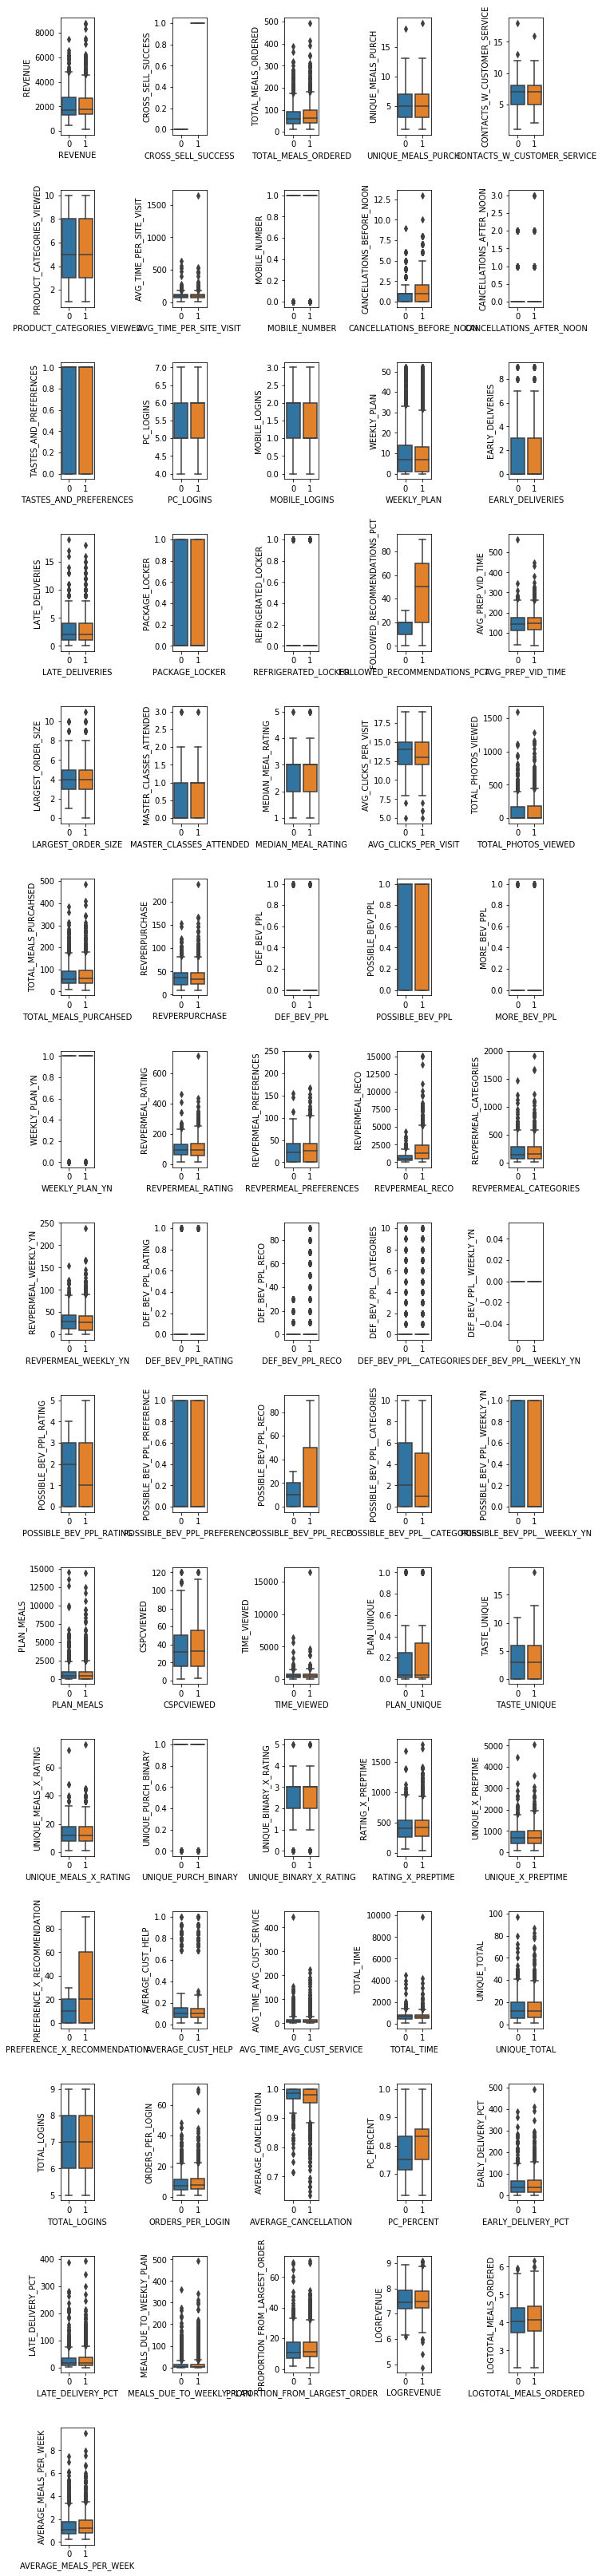

In [11]:
# Creating a user-defined function to plit distplots of each variables

def eda_boxplot(name, row, col, i):
    
    """
  Plot the distribution plot of the feature inside the my_data dataframe with
  CROSS_SELL_SUCCESS which is our dependent variable
  
    """
    plt.subplot(row, col, i)
    sns.boxplot(y = name,
                x = 'CROSS_SELL_SUCCESS',
                data = my_data)
    plt.xlabel(name)

total_plots = []
for name in my_data.columns:
    if (my_data[name].dtype == float or my_data[name].dtype == int):
        total_plots.append(name)

fig, ax = plt.subplots(figsize = (10, 45))
row, col = len(total_plots)/5 + 1, 5
for i in range(len(total_plots)):
    eda_boxplot(total_plots[i], row, col, i+1)
plt.tight_layout()
plt.show()


Looking at the box plots above we can see that some of the features are more information in terms of differentiating between the two classes. We can clearly see that FOLLOWED_RECOMMENDATION_PCT is the feature that is differentiating the most. We should make a change feature based on this as we can clearly see a trend change after 35 for FOLLOWED_RECOMMENDATION_PCT.

***
<h3><strong>Setting outlier thresholds and developing features  based on those thresholds<strong></h3>  

In [12]:
# setting trend-based thresholds
FOLLOWED_REC_PCT_change_lo = 35
CANCELLATIONS_AM_hi = 6
CANCELLATIONS_PM_hi = 2   
AVG_PREP_VID_hi = 290

In [13]:
#Creating outlier based features

# FOLLOWED RECOMMENDATIONS
my_data['change_FOLLOWED_REC'] = 0
condition = my_data.loc[0:,'change_FOLLOWED_REC'][my_data['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_REC_PCT_change_lo]

my_data['change_FOLLOWED_REC'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)
# CANCELLATIONS_AM
my_data['change_CANCELLATIONS_AM'] = 0
condition = my_data.loc[0:,'change_CANCELLATIONS_AM'][my_data['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_AM_hi]

my_data['change_CANCELLATIONS_AM'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)


# CANCELLATIONS_AFTER_NOON
my_data['change_CANCELLATIONS_PM'] = 0
condition = my_data.loc[0:,'change_CANCELLATIONS_PM'][my_data['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_PM_hi]

my_data['change_CANCELLATIONS_PM'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)


# AVG_PREP_VIDEO_TIME
my_data['change_AVG_PREP_VID'] = 0
condition = my_data.loc[0:,'change_AVG_PREP_VID'][my_data['AVG_PREP_VID_TIME'] > AVG_PREP_VID_hi]

my_data['change_AVG_PREP_VID'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)

In [14]:
# setting outlier thresholds based on visual EDA above
TOTAL_MEALS_ORDERED_HI  = 280
UNIQUE_MEALS_PURCH_HI  = 3.5 
UNIQUE_MEALS_PURCH_LO = 2.5
CONTACTS_W_CUSTOMER_SERVICE_HI  = 10
CONTACTS_W_CUSTOMER_SERVICE_LO = 2.5
PRODUCT_CATEGORIES_VIEWED_HI= 2
AVG_TIME_PER_SITE_VISIT_HI  = 190
CANCELLATIONS_BEFORE_NOON_HI = 4
CANCELLATIONS_BEFORE_NOON_LO= 0
CANCELLATIONS_AFTER_NOON_LO = 0
WEEKLY_PLAN_HI = 30
EARLY_DELIVERIES_HI = 6
EARLY_DELIVERIES_LO = 0
LATE_DELIVERIES_HI = 8
LATE_DELIVERIES_LO = 0
PC_LOGINS_OUT = 0
MOBILE_LOGINS_OUT = 0
FOLLOWED_RECOMMENDATIONS_PCT_OUT=30
AVG_PREP_VID_TIME_HI = 280
LARGEST_ORDER_SIZE_HI = 8
LARGEST_ORDER_SIZE_OUT = 4
MASTER_CLASSES_ATTENDED_OUT = 0
MASTER_CLASSES_ATTENDED_HI =  2.5
MEDIAN_MEAL_RATING_HI = 4
AVG_CLICKS_PER_VISIT_LO = 8
TOTAL_PHOTOS_VIEWED_HI = 500

##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# TOTAL_MEALS_ORDERED
my_data['OUT_TOTAL_MEALS_ORDERED'] = 0
condition_hi = my_data.loc[0:,'OUT_TOTAL_MEALS_ORDERED'][my_data['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_HI]

my_data['OUT_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
#UNIQUE_MEALS_PURCH
my_data['OUT_UNIQUE_MEALS_PURCH'] = 0
condition_hi = my_data.loc[0:,'OUT_UNIQUE_MEALS_PURCH'][my_data['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_HI]
condition_lo= my_data.loc[0:,'OUT_UNIQUE_MEALS_PURCH'][my_data['UNIQUE_MEALS_PURCH'] < UNIQUE_MEALS_PURCH_LO]
my_data['OUT_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE
my_data['OUT_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = my_data.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][my_data['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_HI]
condition_lo = my_data.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][my_data['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_LO]

my_data['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

my_data['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#AVG_TIME_PER_SITE_VISIT
my_data['OUT_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = my_data.loc[0:,'OUT_AVG_TIME_PER_SITE_VISIT'][my_data['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_HI]

my_data['OUT_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#CANCELLATIONS_BEFORE_NOON 
my_data['OUT_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = my_data.loc[0:,'OUT_CANCELLATIONS_BEFORE_NOON'][my_data['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_HI]

my_data['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

my_data['OUT_CANCELLATIONS_BEFORE_NOON_LO'] = 0
condition_hi = my_data.loc[0:,'OUT_CANCELLATIONS_BEFORE_NOON_LO'][my_data['CANCELLATIONS_BEFORE_NOON'] == CANCELLATIONS_BEFORE_NOON_LO]

my_data['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#CANCELLATIONS_AFTER_NOON
my_data['OUT_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = my_data.loc[0:,'OUT_CANCELLATIONS_AFTER_NOON'][my_data['CANCELLATIONS_AFTER_NOON'] == CANCELLATIONS_AFTER_NOON_LO]

my_data['OUT_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#PC_LOGINS
my_data['OUT_PC_LOGINS'] = 0
condition_hi = my_data.loc[0:,'OUT_PC_LOGINS'][my_data['PC_LOGINS'] == PC_LOGINS_OUT]

my_data['OUT_PC_LOGINS'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
#MOBILE_LOGINS
my_data['OUT_MOBILE_LOGINS'] = 0
condition_hi = my_data.loc[0:,'OUT_MOBILE_LOGINS'][my_data['MOBILE_LOGINS'] == MOBILE_LOGINS_OUT]

my_data['OUT_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
#WEEKLY_PLAN
my_data['OUT_WEEKLY_PLAN'] = 0
condition_hi = my_data.loc[0:,'OUT_WEEKLY_PLAN'][my_data['WEEKLY_PLAN'] > WEEKLY_PLAN_HI]

my_data['OUT_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#EARLY_DELIVERIES
my_data['OUT_EARLY_DELIVERIES'] = 0
condition_hi = my_data.loc[0:,'OUT_EARLY_DELIVERIES'][my_data['EARLY_DELIVERIES'] > EARLY_DELIVERIES_HI]

my_data['OUT_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

my_data['OUT_EARLY_DELIVERIES_LO'] = 0
condition_hi = my_data.loc[0:,'OUT_EARLY_DELIVERIES_LO'][my_data['EARLY_DELIVERIES'] == EARLY_DELIVERIES_LO]

my_data['OUT_EARLY_DELIVERIES_LO'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#LATE_DELIVERIES
my_data['OUT_LATE_DELIVERIES'] = 0
condition_hi = my_data.loc[0:,'OUT_LATE_DELIVERIES'][my_data['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]

my_data['OUT_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

my_data['OUT_LATE_DELIVERIES_LO'] = 0
condition_hi = my_data.loc[0:,'OUT_LATE_DELIVERIES_LO'][my_data['LATE_DELIVERIES'] ==LATE_DELIVERIES_LO]

my_data['OUT_LATE_DELIVERIES_LO'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#OLLOWED_RECOMMENDATIONS_PCT_OUT
my_data['OUT_FOLLOWED_RECOMMENDATIONS_PCT_OUT'] = 0
condition_hi = my_data.loc[0:,'OUT_FOLLOWED_RECOMMENDATIONS_PCT_OUT'][my_data['FOLLOWED_RECOMMENDATIONS_PCT'] >= FOLLOWED_RECOMMENDATIONS_PCT_OUT]

my_data['OUT_FOLLOWED_RECOMMENDATIONS_PCT_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#AVG_PREP_VID_TIME
my_data['OUT_AVG_PREP_VID_TIME'] = 0
condition_hi = my_data.loc[0:,'OUT_AVG_PREP_VID_TIME'][my_data['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI]

my_data['OUT_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#LARGEST_ORDER_SIZE
my_data['OUT_LARGEST_ORDER_SIZE'] = 0
condition_hi = my_data.loc[0:,'OUT_LARGEST_ORDER_SIZE'][my_data['LARGEST_ORDER_SIZE'] >LARGEST_ORDER_SIZE_HI]

my_data['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

my_data['OUT_LARGEST_ORDER_SIZE_OUT'] = 0
condition_hi = my_data.loc[0:,'OUT_LARGEST_ORDER_SIZE_OUT'][my_data['LARGEST_ORDER_SIZE'] == LARGEST_ORDER_SIZE_OUT]

my_data['OUT_LARGEST_ORDER_SIZE_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


#MASTER_CLASSES_ATTENDED
my_data['OUT_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = my_data.loc[0:,'OUT_MASTER_CLASSES_ATTENDED'][my_data['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_HI]

my_data['OUT_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

my_data['OUT_MASTER_CLASSES_ATTENDED_OUT'] = 0
condition_hi = my_data.loc[0:,'OUT_MASTER_CLASSES_ATTENDED_OUT'][my_data['MASTER_CLASSES_ATTENDED'] == MASTER_CLASSES_ATTENDED_OUT]

my_data['OUT_MASTER_CLASSES_ATTENDED_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#MEDIAN_MEAL_RATING
my_data['OUT_MEDIAN_MEAL_RATING'] = 0
condition_hi = my_data.loc[0:,'OUT_MEDIAN_MEAL_RATING'][my_data['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_HI]

my_data['OUT_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#AVG_CLICKS_PER_VISIT
my_data['OUT_AVG_CLICKS_PER_VISIT'] = 0
condition_lo = my_data.loc[0:,'OUT_AVG_CLICKS_PER_VISIT'][my_data['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_LO]

my_data['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#TOTAL_PHOTOS_VIEWED
my_data['OUT_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = my_data.loc[0:,'TOTAL_PHOTOS_VIEWED'][my_data['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_HI]

my_data['OUT_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


<h4><b> Creating features from names and emails </b></h4>


There are some discrete features such as names and email in our data. Below is an attempt to transform these discrete features to usable features to be used in our models.

The hypothesis here is that people here are casual in providing information (missing last name, first name equals last name or junk email) are probably not serious customers and would not drive revenue and subscribe to the cross sell success plan.

In [15]:
#Checking for people who fill same first and last name
my_data['FIRST_NAME_EQ_LASTNAME'] = (my_data['FIRST_NAME'] == my_data['FAMILY_NAME']).astype(int)

# Features based on missing last name
my_data['M_LASTNAME'] = (my_data['FAMILY_NAME'].isna()).astype(int)

In [16]:
# Creating new variables based on 'EMAIL'

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in my_data.iterrows():
    
    # splitting email domain at '@'
    split_email = my_data.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

personal_email_domains = ['@gmail.com', '@protonmail.com','@yahoo.com']
company_email_domains  = ['@homedepot.com','@intel.com','@unitedtech.com',
                          '@cisco.com','@goldmansacs.com','@jpmorgan.com',
                          '@visa.com','@pfizer.com','@walmart.com','@disney.com',
                          '@mmm.com','@verizon.com','@pg.com','@caterpillar.com',
                          '@boeing.com','@travelers.com','@exxon.com','@unitedhealth.com',
                          '@chevron.com','@microsoft.com','@ge.org','@ibm.com','@dupont.com',
                          '@apple.com','@nike.com','@jnj.com','@merck.com',
                          '@mcdonalds.com','@cocacola.com','@amex.com']
junk_email_domains     = ['@msn.com','@aol.com','@passport.com','@hotmail.com',
                          '@live.com','@me.com']


# Concatenating email domains with original DataFrame

# renaming column to concatenate
email_df.columns = ['name' , 'email_domain']


# concatenating personal_email_domain with friends DataFrame
my_data = pd.concat([my_data, email_df.loc[:,'email_domain']],
                   axis = 1)


# the dataframe now has one more more column: email_domain
my_data.head()

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in my_data['email_domain']:
        if "@" + domain in personal_email_domains:
            placeholder_lst.append('PERSONAL')
            
        elif "@" + domain in company_email_domains:
            placeholder_lst.append('COMPANY')
        
        elif "@" + domain in junk_email_domains:
            placeholder_lst.append('JUNK')
        
        else:
            print('Unknown')
            
            
# concatenating with original DataFrame
my_data['domain_group'] = pd.Series(placeholder_lst)
# one hot encoding categorical variables
one_hot_mail = pd.get_dummies(my_data['domain_group'])


# dropping categorical variables after they've been encoded
my_data = my_data.drop('domain_group', axis = 1)

# joining codings together
my_data = my_data.join([one_hot_mail])

# Craeting dummies from email_domain
one_hot_company = pd.get_dummies(my_data['email_domain'])
my_data = my_data.join([one_hot_company])
my_data.drop(['email_domain'], axis = 1, inplace=True)


<br> <br>
Research suggests that gender could provide some insights to customer buying behavior. Maybe specific wines appeals to specific gender and the cross sell plan is not able to capture the full range of tastes appealing to all. To understand this buying behavior we create a gender based feature where names are used to get  the gender of the user.

Since the name of each customer is avaliable, GENDER GUESSER is used to extract the gender of each customer. 
<strong> It is important to note that this feature is extracted ONLY to better understand customer buying behaviour which has been linked to gender in research. It will not be in used in any discriminatory manner.<br><br>

In [17]:
# List of gender extracted using gender guesser
my_data['gender_guess']= ['unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'female' , 'mostly_female' , 'mostly_female' , 'mostly_female' , 'unknown' , 'male' , 'male' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'female' , 'andy' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'female' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'mostly_male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'mostly_male' , 'female' , 'female' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'male' , 'mostly_male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'andy' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'male' , 'female' , 'male' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'male' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'male' , 'male' , 'male' , 'male' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'female' , 'mostly_female' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'female' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'female' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'male' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'mostly_female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'mostly_male' , 'male' , 'male' , 'male' , 'male' , 'male' , 'female' , 'unknown' , 'unknown' , 'male' , 'male' , 'male' , 'male' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'mostly_male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'male' , 'male' , 'male' , 'male' , 'male' , 'male' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'mostly_female' , 'mostly_female' , 'mostly_female' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'male' , 'male' , 'male' , 'unknown' , 'male' , 'male' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'female' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'female' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'mostly_male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'female' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'male' , 'male' , 'male' , 'male' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'female' , 'male' , 'male' , 'unknown' , 'male' , 'female' , 'unknown' , 'unknown' , 'mostly_male' , 'male' , 'unknown' , 'male' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'mostly_female' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'female' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'female' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'male' , 'male' , 'male' , 'male' , 'male' , 'male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'male' , 'male' , 'male' , 'male' , 'male' , 'unknown' , 'unknown' , 'male' , 'female' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'female' , 'male' , 'male' , 'male' , 'male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'andy' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'male' , 'male' , 'male' , 'male' , 'male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'mostly_female' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'male' , 'male' , 'male' , 'male' , 'male' , 'female' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'female' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'male' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'male' , 'male' , 'male' , 'mostly_male' , 'mostly_male' , 'mostly_male' , 'mostly_male' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'mostly_male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'male' , 'male' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'mostly_male' , 'mostly_male' , 'mostly_male' , 'unknown' , 'male' , 'male' , 'male' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'mostly_female' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'andy' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'female' , 'male' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'mostly_male' , 'female' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'andy' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'mostly_male' , 'mostly_male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'male' , 'male' , 'male' , 'male' , 'male' , 'mostly_male' , 'mostly_male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'male' , 'andy' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'mostly_female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'andy' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'andy' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'mostly_female' , 'mostly_female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'female' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'male' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'andy' , 'unknown' , 'male' , 'unknown' , 'female' , 'female' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'female' , 'unknown' , 'male' , 'unknown' , 'female' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'female' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'male' , 'male' , 'male' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'male' , 'mostly_female' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'male' , 'female' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'male' , 'male' , 'male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'mostly_male' , 'mostly_female' , 'mostly_female' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'female' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'female' , 'female' , 'male' , 'female' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'male' , 'female' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'male' , 'male' , 'unknown' , 'female' , 'unknown' , 'mostly_female' , 'male' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'male' , 'male' , 'male' , 'mostly_male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'mostly_male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'female' , 'female' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'male' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'female' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'andy' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'mostly_female' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'female' , 'female' , 'unknown' , 'female' , 'female' , 'female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'female' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'mostly_female' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'female' , 'unknown' , 'unknown' , 'female' , 'male' , 'male' , 'mostly_male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'male' , 'unknown' , 'female' , 'female' , 'unknown' , 'male' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'unknown' , 'mostly_female' , 'unknown' , 'unknown']

In [18]:
#converting gender to categorical feature for further use
gender = []
for value in my_data['gender_guess']:
    if value == 'male' or value == 'mostly_male':
        value = "M"
    elif value == 'female' or value =='mostly_female':
        value ='F'
    else:
        value = 'U'
    gender.append(value) 
    
my_data['GENDER'] = gender
my_data.drop(['gender_guess'], axis = 1, inplace=True)


#One hot encoding gender 
one_hot_gender = pd.get_dummies(my_data['GENDER'])
my_data = my_data.join([one_hot_gender])
my_data.drop(['GENDER'], axis = 1, inplace=True)

****
Creating a user-defined function to plot confusion matrix, which will be required going forward

In [19]:
# user-defined function: visual_cm
def visual_cm(true_y, pred_y, labels = None, display = True):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y  : true values for the response variable
pred_y  : predicted values for the response variable
labels  : class 0 and class 1 labels respectively, default None
display : whether or not to run plt.show() (not recommended when using methods such as plt.subplots()), default True
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    if display == True:
        
        # heatmap
        sns.heatmap(cm,
                    annot       = True,
                    xticklabels = lbls,
                    yticklabels = lbls,
                    cmap        = 'Blues',
                    fmt         = 'g')

        plt.ylim([0,2])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix of the Classifier')
        
        plt.show()
        
        
    elif display == False:
        # saved heatmap
        hmp = sns.heatmap(cm,
                          annot       = True,
                          xticklabels = lbls,
                          yticklabels = lbls,
                          cmap        = 'Blues',
                          fmt         = 'g')
        plt.ylim([0,2])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix of the Classifier')
        
        return hmp
        
        
    else:
        print("Unexpected input. Please email me your input and I will debug the code.")

****
<h3> Declaring the X_Variables</h3><br>
From all the feature engineering above more than 100 features were available. Some of the similar ones have been dropped and 
the final set of following <strong>80 variables </strong> to be used in our analysis:

In [20]:
# All numeric subset features we can iterate on to get better performance
subset_features = [
'TOTAL_MEALS_ORDERED',
'UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE',
'PRODUCT_CATEGORIES_VIEWED',
'AVG_TIME_PER_SITE_VISIT',
'MOBILE_NUMBER',
'CANCELLATIONS_BEFORE_NOON',
'CANCELLATIONS_AFTER_NOON',
'TASTES_AND_PREFERENCES',
'PC_LOGINS',
'MOBILE_LOGINS',
'WEEKLY_PLAN',
'EARLY_DELIVERIES',
'LATE_DELIVERIES',
'PACKAGE_LOCKER',
'REFRIGERATED_LOCKER',
'FOLLOWED_RECOMMENDATIONS_PCT',
'AVG_PREP_VID_TIME',
'LARGEST_ORDER_SIZE',
'MASTER_CLASSES_ATTENDED',
'MEDIAN_MEAL_RATING',
'AVG_CLICKS_PER_VISIT',
'TOTAL_PHOTOS_VIEWED',
'TOTAL_MEALS_PURCAHSED',
'REVPERPURCHASE',
'DEF_BEV_PPL',
'POSSIBLE_BEV_PPL',
'MORE_BEV_PPL',
'WEEKLY_PLAN_YN',
'REVPERMEAL_RATING',
'REVPERMEAL_PREFERENCES',
'REVPERMEAL_RECO',
'REVPERMEAL_CATEGORIES',
'REVPERMEAL_WEEKLY_YN',
'DEF_BEV_PPL_RATING',
'DEF_BEV_PPL_RECO',
'DEF_BEV_PPL__CATEGORIES',
'DEF_BEV_PPL__WEEKLY_YN',
'POSSIBLE_BEV_PPL_RATING',
'POSSIBLE_BEV_PPL_PREFERENCE',
'POSSIBLE_BEV_PPL_RECO',
'POSSIBLE_BEV_PPL__CATEGORIES',
'POSSIBLE_BEV_PPL__WEEKLY_YN',
'PLAN_MEALS',
'CSPCVIEWED',
'TIME_VIEWED',
'PLAN_UNIQUE',
'TASTE_UNIQUE',
'UNIQUE_MEALS_X_RATING',
'UNIQUE_PURCH_BINARY',
'UNIQUE_BINARY_X_RATING',
'RATING_X_PREPTIME',
'UNIQUE_X_PREPTIME',
'PREFERENCE_X_RECOMMENDATION',
'AVERAGE_CUST_HELP',
'AVG_TIME_AVG_CUST_SERVICE',
'TOTAL_TIME',
'UNIQUE_TOTAL',
'TOTAL_LOGINS',
'ORDERS_PER_LOGIN',
'AVERAGE_CANCELLATION',
'PC_PERCENT',
'EARLY_DELIVERY_PCT',
'LATE_DELIVERY_PCT',
'MEALS_DUE_TO_WEEKLY_PLAN',
'FIRST_NAME_EQ_LASTNAME',
'M_LASTNAME',
'PROPORTION_FROM_LARGEST_ORDER',
'LOGREVENUE',
'AVERAGE_MEALS_PER_WEEK',
'COMPANY',
'JUNK',
'change_FOLLOWED_REC',
'change_CANCELLATIONS_AM',
'change_CANCELLATIONS_PM',
'change_AVG_PREP_VID',
'OUT_FOLLOWED_RECOMMENDATIONS_PCT_OUT',
'OUT_CANCELLATIONS_BEFORE_NOON',
'F',
'M']

<h3>Standardizing the data using Standard Scaler & Train Test Split

In [21]:

my_data_explanatory = my_data[subset_features]

# INSTANTIATING StandardScaler()
scaler = StandardScaler()

# FITTING the data
scaler.fit(my_data_explanatory)

# TRANSFORMING the data
X_scaled     = scaler.transform(my_data_explanatory)

# converting to a DataFrame
X_scaled_df  = pd.DataFrame(my_data_explanatory)
X_scaled_df.columns = my_data_explanatory.columns

my_data_target = my_data.loc[:,'CROSS_SELL_SUCCESS']

# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            my_data_target,
            random_state = 222,
            test_size = 0.25,
            stratify = my_data_target)

<strong>Note: </strong><br>Stratified sampling is used above to ensure same proportion of both classes is maintained in both train and test set. 

<h3> BUILDING AND EVALUATING MODELS </h3> <br>

Four competing models are used for the analysis:
1. Logistic Regression
2. KNN Classifier
3. Decision Tree Classifier
4. Gradient Boosting Classifier

<strong>Steps followed:</strong><br>
Apart from logistic regression, for every model the followings steps were taken:
1. A base model with all 80 variables was run.
2. Using hyper-parameter tuning the best- estimators were computed.
3. Using the best estimator the base model was rerun.
4. From the rerun model, feature importance was extracted.
5. A new model based on extracted important features was run and simultaneoulsy best estimators for this new model were computed using hyper-parameter tuning.
6. A final model consisting only of important variables and hyper-tuned parameters was estimated.

<strong>NOTE:</strong> <br>
For logistic regression <strong>statsmodel</strong> is used due to its <strong> INTERPRETABLE </strong> output. It is noteworthy that results using Scikit Learn LogisticRegreesor were also similar (particularly after hyperparameter tuning). Those results are not shown in the file to maintain brevity and clarity.


<strong><h4> MODEL 1: LOGISTIC REGRESSION </h4></strong><br>

We first trained a base model with all the 80 features to understand how different features are associated with our dependent variable. 
After creating the base model, we iterated over it multiple times until we find a subset of features which are significant and have a high performance on AUC_ROC metric.
The two seemingly best subset of features are shown below as Logit_Model 1 and Logit_Model 2 in candidate dictionary. 


In [22]:
candidate_dict = {

 # full model
 'logit_model1'   : [ 'MOBILE_NUMBER', 
                    'FOLLOWED_RECOMMENDATIONS_PCT', 
                    'REFRIGERATED_LOCKER', 
                    'COMPANY', 
                    'JUNK', 
                    'FIRST_NAME_EQ_LASTNAME', 
                    'POSSIBLE_BEV_PPL_RECO', 
                    'TASTES_AND_PREFERENCES', 
                    'PC_PERCENT', 
                    'CANCELLATIONS_BEFORE_NOON', 
                    'CANCELLATIONS_AFTER_NOON',
                    'F',
                    'change_FOLLOWED_REC'],
 
 # significant variables only
 'logit_model2'    : [ 'MOBILE_NUMBER', 
                    'FOLLOWED_RECOMMENDATIONS_PCT', 
                    'REFRIGERATED_LOCKER', 
                    'COMPANY', 
                    'JUNK', 
                    'FIRST_NAME_EQ_LASTNAME', 
                    'POSSIBLE_BEV_PPL_RECO', 
                    'TASTES_AND_PREFERENCES', 
                    'PC_PERCENT', 
                    'CANCELLATIONS_BEFORE_NOON', 
                    'CANCELLATIONS_AFTER_NOON']
}

In [23]:
#Creating a user defined function to expedite the insertion of variables in model

def get_features_formula(key):
  '''
  Gets the features formula using just the features specified in 
  the list of the key in the candidate_dict dictionary
  '''
  return 'CROSS_SELL_SUCCESS ~ ' + ' + '.join(candidate_dict[key])

**<h5>Model 1.1:</h5><br>**
Logistic regression with features from feature set in Model 1

In [24]:
# instantiating a logistic regression model object
df_train = pd.concat([X_train_scaled, y_train_scaled], axis = 1)

logistic = smf.logit(formula = get_features_formula('logit_model1'), data = df_train)

# FITTING the model object
results_logistic = logistic.fit()

# checking the results SUMMARY
results_logistic.summary()

         Current function value: 0.327570
         Iterations: 35


/Users/mvs/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1445
Method:                           MLE   Df Model:                           13
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.4784
Time:                        22:13:16   Log-Likelihood:                -477.92
converged:                      False   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                5.469e-179
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -2.0354      1.040     -1.957      0.050      -4.074       0.003
MOBILE_NUMBER                    0.8636      0.236      3.659      0.000       0.401       1.326
FOLLOWED_RECOMMENDATIONS_PCT    -0.0205      0.010     -2.044      0.041      -0.040      -0.001
REFRIGERATED_LOCKER              0.1560      0.259      0.603      0.547      -0.351       0.663
COMPANY                          0.7083      0.181      3.912      0.000       0.353       1.063
JUNK                            -1.2717      0.213     -5.981      0.000      -1.688      -0.855
FIRST_NAME_EQ_LASTNAME          -1.3661      0.171     -8.012      0.000      -1.700      -1.032
POSSIBLE_BEV_PPL_RECO           -0.0134      0.009     -1.527      0.127      -0.031       0.004
TASTES_AND_PREFERENCES           0.2969      0.173      1.712      0.087      -0.043       0.637
PC_PERCENT                       2.1599      1.252      1.725      0.085      -0.294       4.614
CANCELLATIONS_BEFORE_NOON        0.2622      0.056      4.678      0.000       0.152       0.372
CANCELLATIONS_AFTER_NOON        -0.3486      0.183     -1.905      0.057      -0.707       0.010
F                               -1.3385      0.329     -4.071      0.000      -1.983      -0.694
change_FOLLOWED_REC             27.2317   1.49e+04      0.002      0.999   -2.91e+04    2.91e+04
================================================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [25]:
# PREDICTING based on the testing set
df_test = pd.DataFrame(X_test_scaled)

lr_tuned_pred_model1 = results_logistic.predict(df_test)

# SCORING the results
print('AUC Score        :', roc_auc_score(y_true  = y_test_scaled,
                                  y_score = lr_tuned_pred_model1).round(3))

# Assigning score
AUC_SCORE_LOGIT_MODEL1= roc_auc_score(y_true  = y_test_scaled,
                                  y_score = lr_tuned_pred_model1).round(3)

AUC Score        : 0.904


<br>

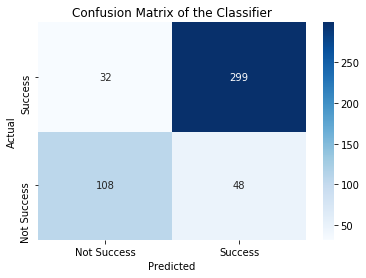

In [26]:
# PREDICTING based on the testing set and NEW PORBABILITY THRESHOLD
threshold = 0.45
logreg_THRESH_pred = np.where(lr_tuned_pred_model1 > threshold, 1, 0)
visual_cm(y_test_scaled, logreg_THRESH_pred, labels = ['Not Success', 'Success' ], 
          display = True)

<strong>IMPORTANT NOTE:</strong><br>
Though the model seems to be doing good with an AUC of .904, it contains gender-based features which might introduce gender bias in the model and recommendations.<br> Also we see that all the users above FOLLOWED_RECOMMENDATIONS_PCT greater than 35% always subscribe to the cross sell success plan in our dataset thus making change_FOLLOWED_REC a really good but not significant (as there are no non-subscriptions or 0 values in cross sell success for FOLLOWED_RECOMMENDATIONS_PCT above 35%) indicator of the model.<br> Model_2 is same as Model_1 but excludes gender-based features to remove any bias and FOLLOWED_RECOMMENDATIONS_PCT feature as it is not significant in the model.

<h5><strong>Model 1.2:</h5></strong> <br>
Logistic regression with features as per set in Model 2.

In [27]:
# instantiating a logistic regression model object
df_train = pd.concat([X_train_scaled, y_train_scaled], axis = 1)

logistic = smf.logit(formula = get_features_formula('logit_model2'), data = df_train)

# FITTING the model object
results_logistic = logistic.fit()

# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.406382
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1447
Method:                           MLE   Df Model:                           11
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.3529
Time:                        22:13:17   Log-Likelihood:                -592.91
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                1.515e-131
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -3.5008      0.952     -3.677      0.000      -5.367      -1.635
MOBILE_NUMBER                    0.8026      0.215      3.726      0.000       0.380       1.225
FOLLOWED_RECOMMENDATIONS_PCT     0.0658      0.006     11.712      0.000       0.055       0.077
REFRIGERATED_LOCKER              0.4533      0.236      1.921      0.055      -0.009       0.916
COMPANY                          0.7553      0.170      4.431      0.000       0.421       1.089
JUNK                            -1.3319      0.186     -7.159      0.000      -1.697      -0.967
FIRST_NAME_EQ_LASTNAME          -1.3800      0.154     -8.962      0.000      -1.682      -1.078
POSSIBLE_BEV_PPL_RECO           -0.0129      0.005     -2.399      0.016      -0.023      -0.002
TASTES_AND_PREFERENCES           0.3435      0.158      2.168      0.030       0.033       0.654
PC_PERCENT                       2.4364      1.149      2.120      0.034       0.184       4.689
CANCELLATIONS_BEFORE_NOON        0.2393      0.052      4.609      0.000       0.138       0.341
CANCELLATIONS_AFTER_NOON        -0.3317      0.160     -2.067      0.039      -0.646      -0.017
================================================================================================
"""

<br>

In [28]:
# PREDICTING based on the testing set
lr_tuned_pred_model2 = results_logistic.predict(X_test_scaled
                                            [candidate_dict['logit_model2']])

# SCORING the results
print(
    'AUC     :', roc_auc_score(y_true  = y_test_scaled, 
                               y_score = lr_tuned_pred_model2).round(3))

# Assigning score 
AUC_SCORE_LOGIT_MODEL2= roc_auc_score(y_true  = y_test_scaled,
                                  y_score = lr_tuned_pred_model2).round(3)

AUC     : 0.861


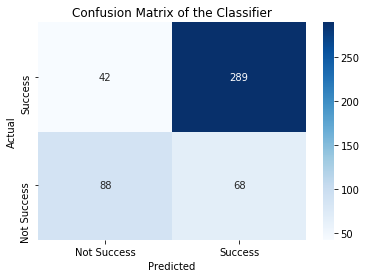

In [29]:
# PREDICTING based on the testing set and NEW PORBABILITY THRESHOLD
threshold = 0.44
logreg_THRESH_pred = np.where(lr_tuned_pred_model2 > threshold, 1, 0)
visual_cm(y_test_scaled, logreg_THRESH_pred, labels = ['Not Success', 'Success' ], 
          display = True)

<br>

***
<strong><h4>MODEL 2: KNN Model </h4></strong>

Creating a user-defined function to estimate optimal number of neighbors.

In [30]:
# Creating a user-defined function

def optimal_neighbors(X_train,
                      y_train,
                      X_test,
                      y_test,
                      max_neighbors=20):


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)
    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors = n_neighbors)
        clf.fit(X_train, y_train)            
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))

        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1

# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_train_scaled, y_train_scaled,
                                  X_test_scaled, y_test_scaled)

The optimal number of neighbors is: 10


<h5> Model 2.1 - Full KNN Model: </h5> <br>

Estimating a KNN Model with full set of 80 variables

In [31]:
# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = 10)

# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled[subset_features], y_train_scaled)

# PREDICTING based on the testing set
knn_pred = knn_fit.predict_proba(X_test_scaled[subset_features])[:,1]

# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled[subset_features], y_train_scaled).round(3))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled[subset_features], y_test_scaled).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test_scaled,
                                          y_score = knn_pred).round(3))

Training ACCURACY: 0.752
Testing  ACCURACY: 0.702
AUC Score        : 0.759


<h5> Model 2.2 - KNN Model based on selected features </h5>

This model uses features from logit_Model 2 define above.

In [32]:
# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = 10)

# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled[candidate_dict['logit_model1']], y_train_scaled)

# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled[candidate_dict['logit_model1']])
knn_pred_p = knn_fit.predict_proba(X_test_scaled[candidate_dict['logit_model1']])[:, 1]

# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled[candidate_dict['logit_model1']], y_train_scaled).round(3))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled[candidate_dict['logit_model1']], y_test_scaled).round(3))
AUC_SCORE_KNN = roc_auc_score(y_true  = y_test_scaled, y_score = knn_pred_p).round(3)
print('AUC Score        :', AUC_SCORE_KNN)

Training ACCURACY: 0.851
Testing  ACCURACY: 0.782
AUC Score        : 0.87


<br>

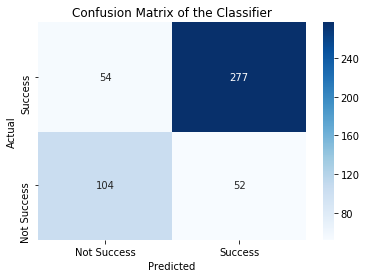

In [33]:
visual_cm(y_test_scaled, knn_pred, labels = ['Not Success', 'Success' ], display = True)

From the above iteration we can clearly see that only adding a subset of significant features to KNN will improve the performance of the model.

***
<strong><h4> MODEL 3: Decision Tree Classifier </strong></h4>

<h5>Model 3.1 - Full Decisin Tree Classifer :</h5> <br>
Running full model with 80 features using decision tree classifier

In [34]:
# Train decision tree classifier
dt = DecisionTreeClassifier(max_depth= 4, random_state= 222)
dt.fit(X_train_scaled, y_train_scaled)

dt_pred = dt.predict_proba(X_test_scaled)[:,1]

# SCORING the results
print('Training ACCURACY:', dt.score(X_train_scaled, y_train_scaled).round(3))
print('Testing  ACCURACY:', dt.score(X_test_scaled, y_test_scaled).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test_scaled,
                                          y_score = dt_pred).round(3))

Training ACCURACY: 0.831
Testing  ACCURACY: 0.793
AUC Score        : 0.878


<h5> Hyper- parameter tuning :</h5> <br> 
Hypertuning parameters on above mentioned full model to get the best parameters for DT model.

In [35]:

# declaring a hyperparameter space

## Random search through optimal params
params = {'criterion': ['gini', 'entropy'],
        'splitter' : ['best', 'random'],
        'max_depth': pd.np.arange(1, 25),
        'min_samples_leaf': pd.np.arange(1, 100)}

# INSTANTIATING the model object without hyperparameters
dc_tree = DecisionTreeClassifier(random_state = 222)


# GridSearchCV object
dc_tree_cv = RandomizedSearchCV(dc_tree, 
                                   param_distributions=params, 
                                   n_iter= 10, 
                                   scoring=make_scorer(roc_auc_score, needs_threshold=False), 
                                   n_jobs=4, 
                                   verbose=3, 
                                   random_state=222, 
                                   cv= 3)


# FITTING to the FULL DATASET (due to cross-validation)
dc_tree_cv.fit(X_train_scaled, y_train_scaled)

# printing the optimal parameters and best score
print("Tuned Parameters  :", dc_tree_cv.best_params_)

# Printing out feature 
dc_tree_cv.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 63, 'max_depth': 21, 'criterion': 'gini'}


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    2.7s finished


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=21,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=63, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=222, splitter='best')

<h5> Model 3.3 - Full Decision Tree Classifier with Best Estimators:</h5> <br>
Running the model with all features and best estimators as found via hyper-parameter tuning.

In [36]:
# Instantiating
tuned_dc_tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=21,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=63, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=222, splitter='best')
# Fitting
tuned_dc_tree.fit(X_train_scaled, y_train_scaled)


# Predicting
tuned_dc_tree_pred_p = tuned_dc_tree.predict_proba(X_test_scaled)[:,1]
tuned_dc_tree_pred = tuned_dc_tree.predict(X_test_scaled)

# printing the optimal parameters and best score
print('Training ACCURACY:', tuned_dc_tree.score(X_train_scaled, y_train_scaled).round(3))
print('Testing  ACCURACY:', tuned_dc_tree.score(X_test_scaled, y_test_scaled).round(3))

print('AUC Score        :', roc_auc_score(y_true  = y_test_scaled,
                                  y_score = tuned_dc_tree_pred_p).round(3))


# Printing feature importance
for i in sorted(zip(tuned_dc_tree.feature_importances_ , X_train_scaled.columns), reverse= True)[:10]:
    print(i)


Training ACCURACY: 0.829
Testing  ACCURACY: 0.76
AUC Score        : 0.861
(0.6595559502112921, 'FOLLOWED_RECOMMENDATIONS_PCT')
(0.10728657673720925, 'JUNK')
(0.1043985568775218, 'FIRST_NAME_EQ_LASTNAME')
(0.04433051694449197, 'CANCELLATIONS_BEFORE_NOON')
(0.034615015705415315, 'REVPERMEAL_RECO')
(0.018210527958434444, 'COMPANY')
(0.013314667091615945, 'UNIQUE_TOTAL')
(0.007928298892733745, 'TOTAL_PHOTOS_VIEWED')
(0.006264678693026253, 'LOGREVENUE')
(0.004095210888259203, 'PLAN_MEALS')


<strong> NOTE: </strong> <br>
From the results of feature importance it is evident that only a few variables are contributing to the model. Accordingly, only the features with a feature importance  of .01 and above are considered significant and used for further analysis.

<br>

In [37]:
# Important variables from Model 3.3

sig_features_dc_tree = ['FOLLOWED_RECOMMENDATIONS_PCT', 'JUNK', 
                        'FIRST_NAME_EQ_LASTNAME', 'CANCELLATIONS_BEFORE_NOON',
                        'REVPERMEAL_RECO', 'COMPANY', 'UNIQUE_TOTAL' ]



<h5> Model 3.4 - Hyper-parameter tuning II.</h5> <br>

Hyper parameter tuning on a model with only the significant features (found above)

In [38]:

# declaring a hyperparameter space

## Random search through optimal params
params = {'criterion': ['gini', 'entropy'],
        'splitter' : ['best', 'random'],
        'max_depth': pd.np.arange(1, 25),
        'min_samples_leaf': pd.np.arange(1, 100)}

# INSTANTIATING the model object without hyperparameters
sig_dc_tree = DecisionTreeClassifier(random_state = 222)


# GridSearchCV object
sig_dc_tree_cv = RandomizedSearchCV(sig_dc_tree, 
                                   param_distributions=params, 
                                   n_iter= 10, 
                                   scoring=make_scorer(roc_auc_score, needs_threshold=False), 
                                   n_jobs=4, 
                                   verbose=3, 
                                   random_state=222, 
                                   cv= 3)


# FITTING to the FULL DATASET (due to cross-validation)
sig_dc_tree_cv.fit(X_train_scaled[sig_features_dc_tree], y_train_scaled)


# printing the optimal parameters and best score
print("Tuned Parameters  :", sig_dc_tree_cv.best_params_)

dc_tree_cv.best_estimator_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 24, 'max_depth': 18, 'criterion': 'entropy'}


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.2s finished


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=21,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=63, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=222, splitter='best')

<h5> Model 3.5- Select model with hyper-parameter tuned estimators:</h5> <br>
Running the model with important features and  best estimators as found via hyperparameter tuning.

AUC Score  : 0.865


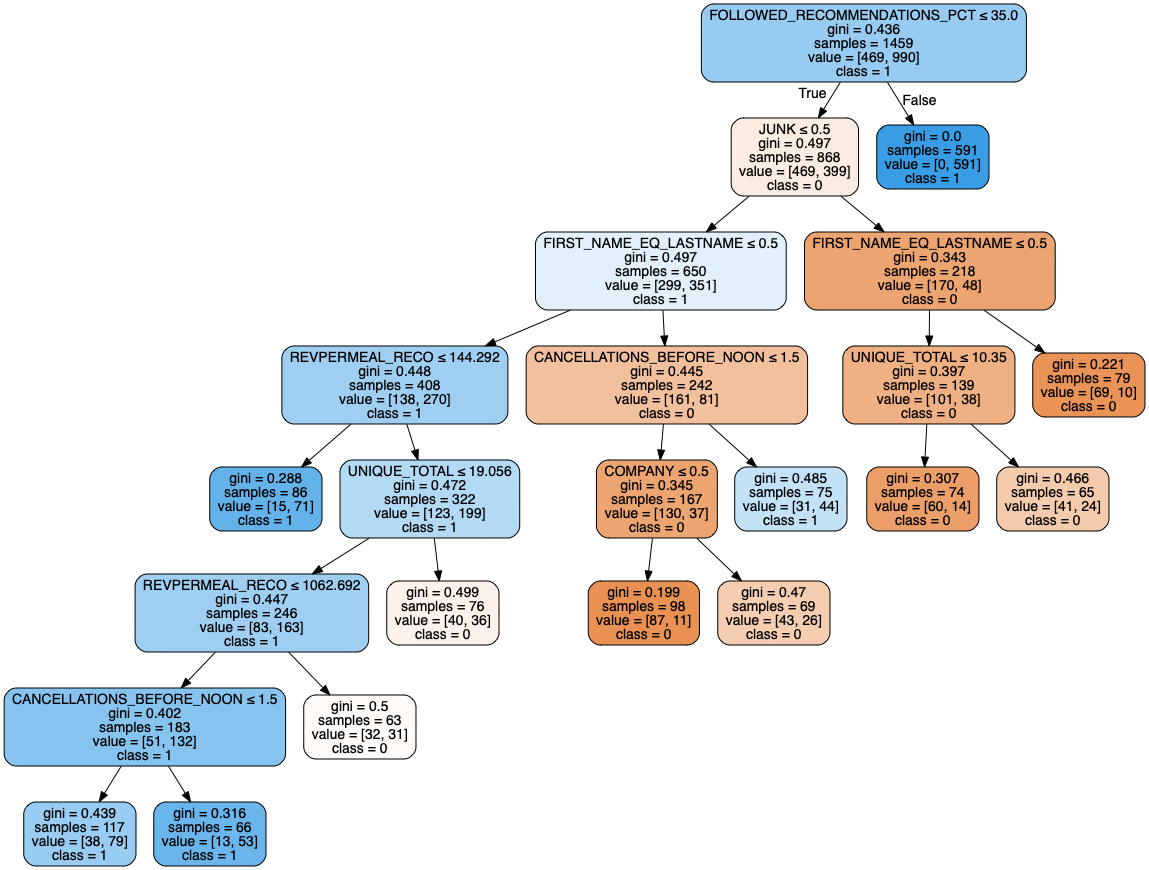

In [39]:
# Instaintiating
tuned_sig_dc_tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=21,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=63, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=222, splitter='best')
# Fititng
tuned_sig_dc_tree.fit(X_train_scaled[sig_features_dc_tree], y_train_scaled)


# Predicting
tuned_sig_dc_tree_pred_p = tuned_sig_dc_tree.predict_proba(X_test_scaled[sig_features_dc_tree])[:,1]
tuned_sig_dc_tree_pred = tuned_sig_dc_tree.predict(X_test_scaled[sig_features_dc_tree])

# printing the optimal parameters and best score
AUC_SCORE_DECISIONTREE = roc_auc_score(y_true  = y_test_scaled,
                                  y_score = tuned_sig_dc_tree_pred_p).round(3)
print('AUC Score  :', AUC_SCORE_DECISIONTREE)


# Displaying the final tree
dot_data = StringIO()
export_graphviz(tuned_sig_dc_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X_train_scaled[sig_features_dc_tree].columns,
               class_names= '01')
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<br>
*It is evident from tree that 'FOLLOWED_RECOMMENDATIONS_PCT' is the single MOST IMPORTANT feature in the dataset. Every single customer having FOLLOWED_RECOMMENDATIONS_PCT >= 35 has subscribed to HALFWAY PLAN.* <br><br>

We can also see that the performance of decision tree improves as we only added subset of features instead of all the 80 features in the model.


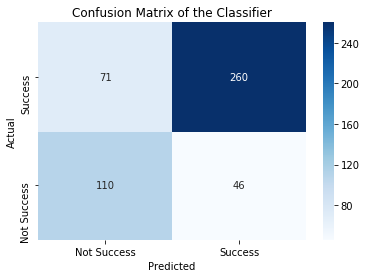

In [40]:
# Dsiplaying the confusion matrix
visual_cm(y_test_scaled, tuned_sig_dc_tree_pred, labels = 
                                  ['Not Success', 'Success' ], display = True)

***
<h4>Model 4: Gradient Boosting</h4>

<h5> Model 4.1 - Full Gradient Boosting Model </h5>

In [41]:
#Instanitiating 
gbt = GradientBoostingClassifier()

#Fitting 
full_gbm=gbt.fit(X_train_scaled, y_train_scaled)

#Predicting 
full_gbm_pred_p = full_gbm.predict_proba(X_test_scaled)[:,1]
full_gbm_pred = full_gbm.predict(X_test_scaled)

#Printing train, test accuracy and AUC
print('Training ACCURACY:', full_gbm.score(X_train_scaled, y_train_scaled).round(3))
print('Testing ACCURACY :', full_gbm.score(X_test_scaled, y_test_scaled).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test_scaled,
                                          y_score = full_gbm_pred_p).round(3))

Training ACCURACY: 0.925
Testing ACCURACY : 0.799
AUC Score        : 0.881


We can see that the above model is overfitting, we will now run hyper parameter tuning to get a better model which is not overfitting and has better performance.

<h5> Model 4.2- Hyper-parameter tuning: </h5> <br>
Hyper parameter tuning on full set of features in Gradient Boosting model to find best estimators.

In [42]:
## Hyper parameter tuning for GBM
params = {
        'min_samples_leaf': [20, 30, 40, 50],
        'subsample': [0.6, 0.8, 1.0],
        'n_estimators': [700 ,800, 850, 900],
        'max_depth': [2, 3, 4, 5],
        'learning_rate': [0.01, 0.05, 0.1]
        }

gbm_tree = GradientBoostingClassifier(random_state=222, warm_start = True)

gbm_tree_cv = RandomizedSearchCV(gbm_tree,
                                   param_distributions=params, 
                                   n_iter=3, # Increase this number to get most optimal tree 
                                   scoring=make_scorer(roc_auc_score, needs_threshold=False), 
                                   n_jobs=4, 
                                   verbose=3, 
                                   random_state=222, 
                                   cv=3
                                   )

#### Uncomment to run random search cv ####

# gbm_tree_cv.fit(X_train_scaled, y_train_scaled)  
# printing the optimal parameters and best score
# print("Best Parameters  :", gbm_tree_cv.best_params_)

# Printing out best estimators
# gbm_tree_cv.best_estimator_

~~~
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   44.6s finished
Best Parameters  : {'subsample': 0.8, 'n_estimators': 900, 'min_samples_leaf': 40, 'max_depth': 2, 'learning_rate': 0.01}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=900,
                           n_iter_no_change=None, presort='auto',
                           random_state=222, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)
~~~

<h5> Model 4.3 - Full Gradient boosting model with Best Estimators:</h5> <br>
Running the model with all features and best estimators as found via hyper-parameter tuning.

In [43]:
# Instantiating
tuned_gbm_tree = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=900,
                           n_iter_no_change=None, presort='auto',
                           random_state=222, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)

# Fitting
tuned_gbm_tree.fit(X_train_scaled, y_train_scaled)


# Predicting
tuned_gbm_tree_pred_p = tuned_gbm_tree.predict_proba(X_test_scaled)[:,1]

# printing the optimal parameters and best score
print('Training ACCURACY:', tuned_gbm_tree.score(X_train_scaled, y_train_scaled).round(3))
print('Testing  ACCURACY:', tuned_gbm_tree.score(X_test_scaled, y_test_scaled).round(3))

print('AUC Score full untuned  :', roc_auc_score(y_true  = y_test_scaled,
                                  y_score = tuned_gbm_tree_pred_p).round(3))

# printing feature importance
for i in sorted(zip(tuned_gbm_tree.feature_importances_ , X_train_scaled.columns),
                reverse= True)[:10]:
    print(i)


Training ACCURACY: 0.878
Testing  ACCURACY: 0.813
AUC Score full untuned  : 0.899
(0.28578925493366847, 'change_FOLLOWED_REC')
(0.2842636761857734, 'FOLLOWED_RECOMMENDATIONS_PCT')
(0.08567250537268166, 'FIRST_NAME_EQ_LASTNAME')
(0.07676085282800055, 'JUNK')
(0.05412418711124259, 'REVPERMEAL_RECO')
(0.03661971635866242, 'CANCELLATIONS_BEFORE_NOON')
(0.028035106614179482, 'COMPANY')
(0.013055479805915982, 'F')
(0.011877012150182577, 'MOBILE_NUMBER')
(0.008179562631325842, 'TIME_VIEWED')


Choosing the best features based on  hyper parameter tuned model:

In [44]:
# Important variables from Model 4.3

sig_features_gbm_tree = ['change_FOLLOWED_REC','FOLLOWED_RECOMMENDATIONS_PCT', 'JUNK', 
                        'FIRST_NAME_EQ_LASTNAME', 'CANCELLATIONS_BEFORE_NOON',
                        'REVPERMEAL_RECO', 'COMPANY', 'F', 'MOBILE_NUMBER' ]



<h5> Model 4.4 - Hyper-parameter tuning II.</h5> <br>

Hyper parameter tuning on a model with only the significant features (found above)

In [45]:
## Hyper parameter tuning for GBM
params = {
        'min_samples_leaf': [20, 30, 40, 50],
        'subsample': [0.6, 0.8, 1.0],
        'n_estimators': [700 ,800, 850, 900],
        'max_depth': [2, 3, 4, 5],
        'learning_rate': [0.01, 0.05, 0.1]
        }

gbm_tree = GradientBoostingClassifier(random_state=222, warm_start = True)

sig_gbm_tree_cv = RandomizedSearchCV(gbm_tree,
                                   param_distributions=params, 
                                   n_iter=10, # increase this to get most optimal tree 
                                   scoring=make_scorer(roc_auc_score, needs_threshold=False), 
                                   n_jobs=4, 
                                   verbose=3, 
                                   random_state=222, 
                                   cv=3
                                   )

#### Uncomment to run random search cv   #####

# sig_gbm_tree_cv.fit(X_train_scaled[sig_features_gbm_tree], y_train_scaled) #Enable this to run random search cv

# printing the optimal parameters and best score
# print("Tuned Parameters  :", sig_gbm_tree_cv.best_params_)

# sig_gbm_tree_cv.best_estimator_


~~~
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   6 out of   9 | elapsed:    5.7s remaining:    2.9s
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:    7.4s finished
Tuned Parameters  : {'subsample': 0.8, 'n_estimators': 900, 'min_samples_leaf': 40, 'max_depth': 2, 'learning_rate': 0.01}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=900,
                           n_iter_no_change=None, presort='auto',
                           random_state=222, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)
~~~

<h5> Model 4.5- Select model with hyper-parameter tuned estimators:</h5> <br>
Running the model with important features and  best estimators as found via hyperparameter tuning.

In [46]:
tuned_sig_gbm_tree = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=900,
                           n_iter_no_change=None, presort='auto',
                           random_state=222, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)
tuned_sig_gbm_tree.fit(X_train_scaled[sig_features_gbm_tree], y_train_scaled)


# PREDICTING on test data
tuned_sig_gbm_tree_pred_p = tuned_sig_gbm_tree.predict_proba(X_test_scaled[sig_features_gbm_tree])[:,1]
tuned_sig_gbm_tree_pred = tuned_sig_gbm_tree.predict(X_test_scaled[sig_features_gbm_tree])

# printing the optimal parameters and best score
print('Training ACCURACY:', tuned_sig_gbm_tree.score(X_train_scaled[sig_features_gbm_tree], y_train_scaled).round(3))
print('Testing  ACCURACY:', tuned_sig_gbm_tree.score(X_test_scaled[sig_features_gbm_tree], y_test_scaled).round(3))
AUC_SCORE_GBM = roc_auc_score(y_true  = y_test_scaled,
                                  y_score = tuned_sig_gbm_tree_pred_p).round(3)
print('AUC Score        :', AUC_SCORE_GBM)


Training ACCURACY: 0.848
Testing  ACCURACY: 0.819
AUC Score        : 0.898


<br>

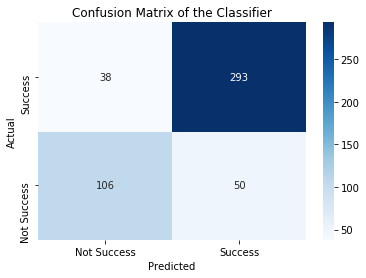

In [47]:
# Creating confusion matrix
visual_cm(y_test_scaled, tuned_sig_gbm_tree_pred, labels = 
          ['Not Success', 'Success' ], display = True)

In [48]:
# Model Performance

print(f"""
Model                           AUC      
----------------            ----------       

Logit_Model 1                  {AUC_SCORE_LOGIT_MODEL1}               
Logit_Model 2                  {AUC_SCORE_LOGIT_MODEL2}             
KNN                            {AUC_SCORE_KNN}      
Decision Tree Classifier       {AUC_SCORE_DECISIONTREE}
Gradient Boosting              {AUC_SCORE_GBM}


The best model is Logit_Model 1.

""")


Model                           AUC      
----------------            ----------       

Logit_Model 1                  0.904               
Logit_Model 2                  0.861             
KNN                            0.87      
Decision Tree Classifier       0.865
Gradient Boosting              0.898


The best model is Logit_Model 1.




<strong>Logit_Model</strong> 1 appears to be best not only in terms of AUC but also has a high <strong>SENSITIVITY </strong> of about 90% and high <strong> SPECIFICITY</strong> of about 70%. For our purposes it is important that we focus on  False Negatives more than False Positives as we may lose opportunity of potential customers.
***
***
***

In [49]:
thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
tmin, tsec = divmod(temp_sec, 60)
print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


 Time taken: 0 hours 0 minutes and 27.17 seconds.
